## Importing required libraries


In [1]:
# Import libraries
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
import cv2

In [2]:
dataset_path = 'yalefaces/'
train_path= 'newtrain/'
test_path= 'newtest/'
dataset_dir  = os.listdir(dataset_path)
train_dir=os.listdir(train_path)
test_dir=os.listdir(test_path)
width  = 320
height = 243

## Getting train and test images

Here, we also preprocess the data to from 243x320 to 55x55 to increase the speed of computation

Train Images:


c:\users\san19\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


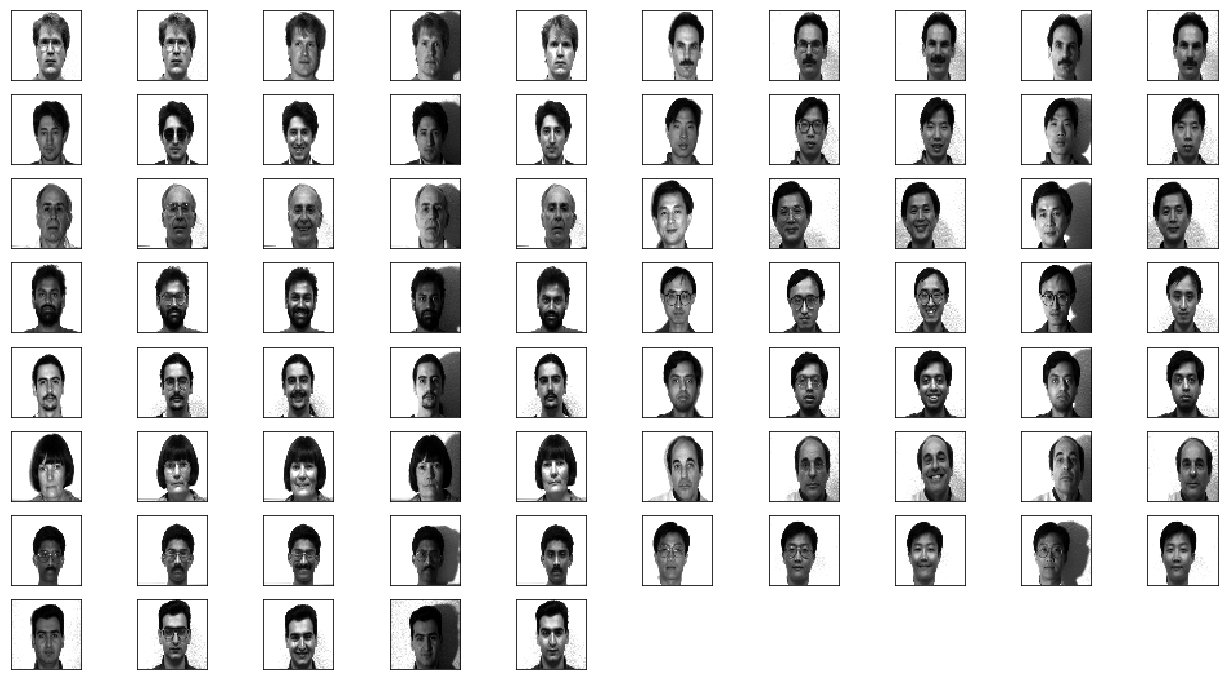

Test Images:


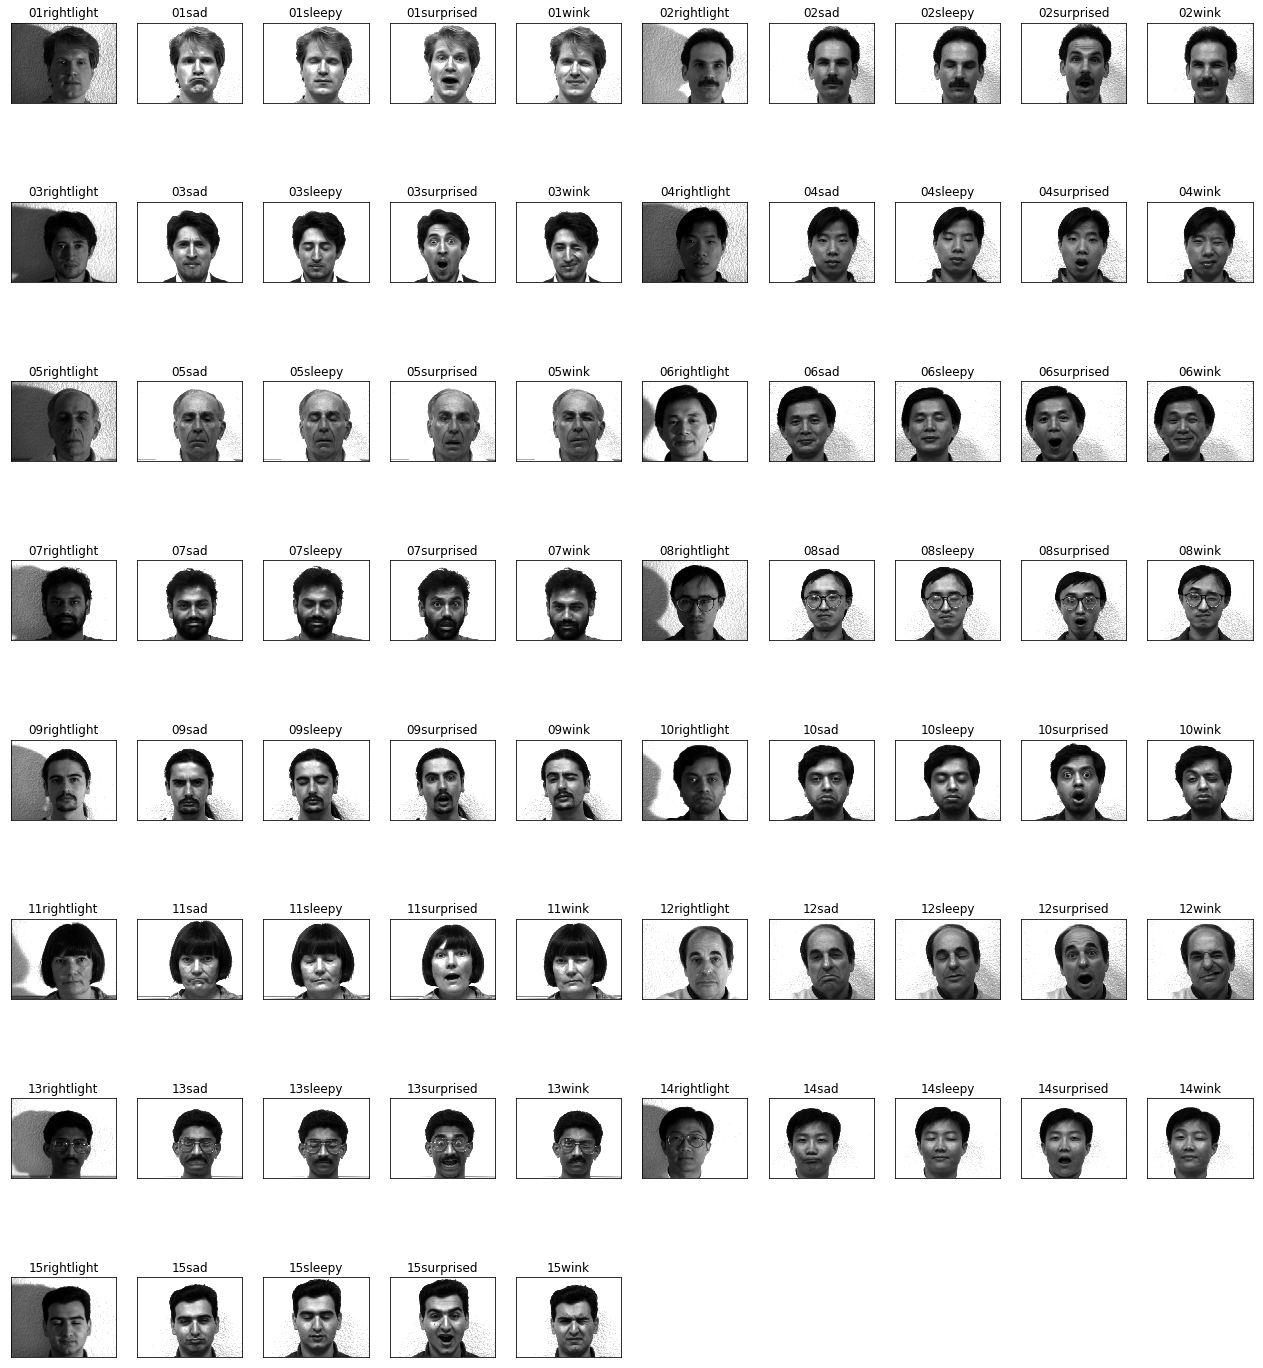

In [3]:
print('Train Images:')
train_image_names = train_dir
training_tensor   = np.ndarray(shape=(len(train_image_names), 55*55), dtype=np.float64)
lst=[]
lstnoresize=[]
for i in range(len(train_image_names)):
    img = plt.imread(train_path + train_image_names[i])
    imresize=cv2.resize(img,(55,55)) #Pre processing
    training_tensor[i,:] = np.array(imresize, dtype='float64').flatten()
    lst.append(imresize)
    plt.subplot(10,10,1+i)
    plt.imshow(imresize, cmap='gray')
    plt.subplots_adjust(right=3.0, top=3)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()
images=np.array(lst)
print('Test Images:')
test_image_names = test_dir
testing_tensor   = np.ndarray(shape=(len(test_image_names), 55*55), dtype=np.float64)

for i in range(len(test_image_names)):
    img = imread(test_path + test_image_names[i])
    testresize=cv2.resize(img,(55,55))
    testing_tensor[i,:] = np.array(testresize, dtype='float64').flatten()
    plt.subplot(8,10,1+i)
    plt.title(test_image_names[i].split('.')[0][-2:]+test_image_names[i].split('.')[1])
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=3.0, top=5)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Finding the mean face

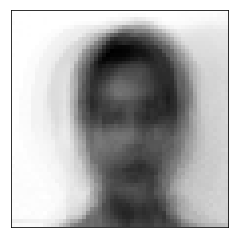

3025

In [4]:
mean_face = np.zeros((1,55*55))
for i in training_tensor:
    mean_face = np.add(mean_face,i)
mean_face = np.divide(mean_face,float(len(train_image_names))).flatten()
plt.imshow(mean_face.reshape(55, 55), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()
len(mean_face)

## Finding principal components, Eigenvectors and Eigenvalues

In [5]:
img_vectors=np.reshape(images,(images.shape[0],images.shape[1]*images.shape[2])) #flattening each image in the array to 1*3025
shortmean=np.mean(img_vectors,axis=0)
image_std_vec=np.std(img_vectors,axis=0)
normalized=[]
for j in img_vectors:
    normalized.append((j-shortmean)) #normalizing each image by subtracting mean face and dividing by standard deviation
normalized=np.array(normalized)
covar=np.cov(np.transpose(normalized)) #finding the covariance matrix
print(mean_face.shape)
print("Computing Eigen vectors")
eigvals, eigvects=np.linalg.eig(covar) #finding eigenvalues and eigenvectors of covariance matrix
print("Eigen vectors calculated")
mean_face=np.reshape(shortmean,(images.shape[1]*images.shape[2]))
print(covar.shape)

(3025,)
Computing Eigen vectors
Eigen vectors calculated
(3025, 3025)


## Top 10 Eigenfaces

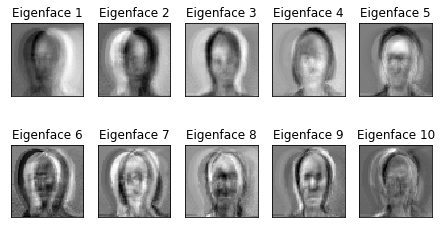

(3025, 3025)


In [6]:
idx = eigvals.argsort()[::-1]   
eigvals = eigvals[idx]
eigvects = eigvects[:,idx]
eig_vectors=np.real(np.transpose(eigvects))
for i in range(10):
    img = eig_vectors[i].reshape(images.shape[1],images.shape[2])
    plt.subplot(2,5,1+i)
    plt.imshow(img, cmap='gray')
    plt.title("Eigenface "+str(i+1))
    plt.subplots_adjust(right=1.1, top=0.9)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    
plt.show()
print(eig_vectors.shape)
imp_eig_vectors=eig_vectors[:60] #taking only first 60 eigenvectors
eig_vectors_pca=eig_vectors[3:13] #for pca computation

## Reading an unknown face

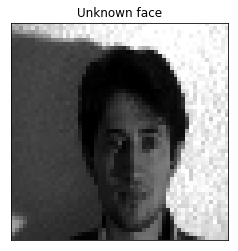

In [7]:
#image reconstruction
unknown_face        = plt.imread('newtest/subject03.rightlight.jpg')
unknown_face_resize=cv2.resize(unknown_face,(55,55))
unknown_face_vector = np.array(unknown_face_resize, dtype='float64').flatten()
plt.imshow(unknown_face_resize, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Finding the image classified to


In [8]:
#first we need the weights for each training image. We project the normalized vector to imp_eig_vectors
w = np.array([np.dot(eig_vectors_pca,i) for i in normalized]) #dont use normalized
print(w[0].shape)

(10,)


27


Text(0.5, 1.0, 'Recognized Person')

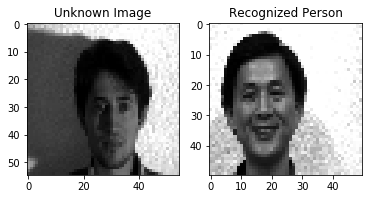

In [9]:

normalized_u_vector=np.subtract(unknown_face_vector,mean_face) #normalize unknown face by subtracting mean
uk_wt=np.dot(eig_vectors_pca,normalized_u_vector) #get weights of normalized vector
diff=w-uk_wt #find the difference
norms=np.linalg.norm(diff,axis=1) #calculate the norm for each training image for the given test image
index=np.argmin(norms) #find the index of the minimum norm (Distance)
print(index) 
plt.subplot(1,2,1)
plt.imshow(unknown_face_resize,cmap='gray')
plt.title('Unknown Image')
plt.subplot(1,2,2)
plt.imshow(cv2.resize(imread('newtrain/'+train_image_names[index]),(50,50)), cmap='gray')
plt.title('Recognized Person')

## Finding classification for all the test images

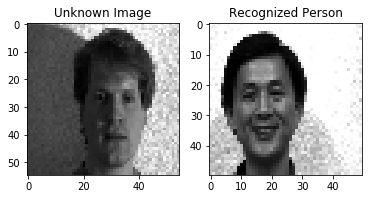

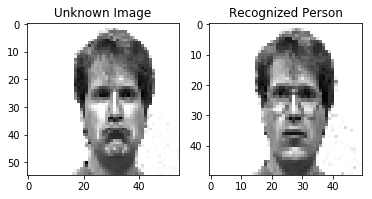

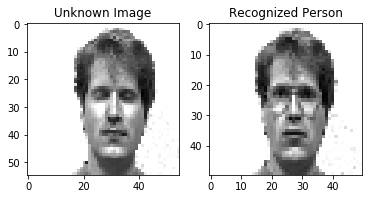

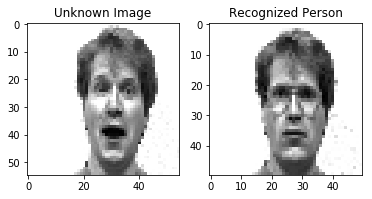

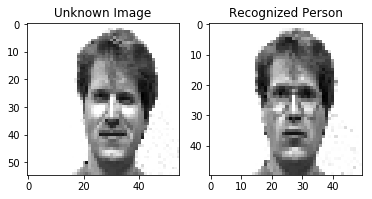

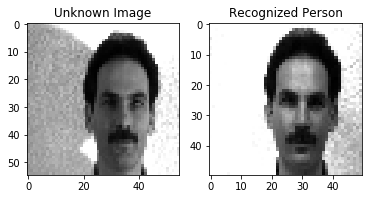

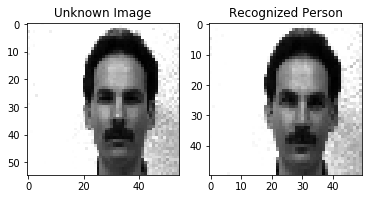

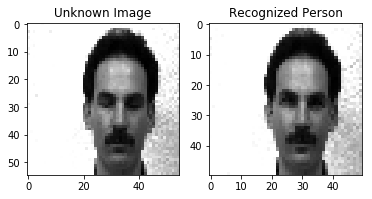

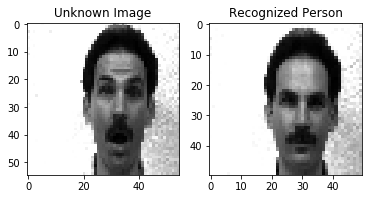

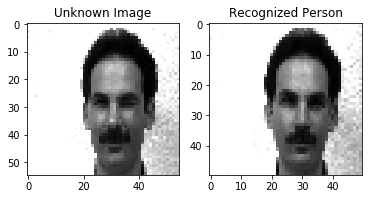

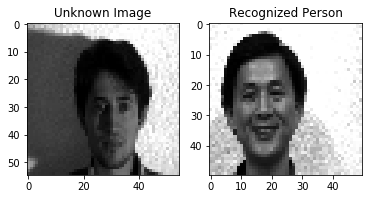

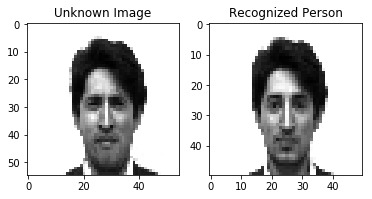

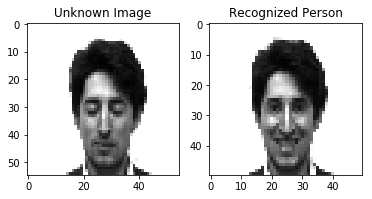

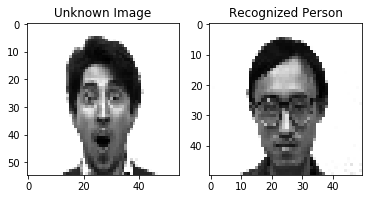

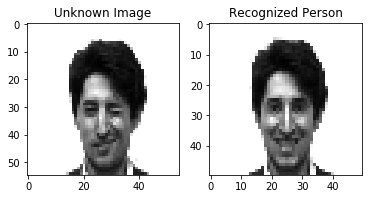

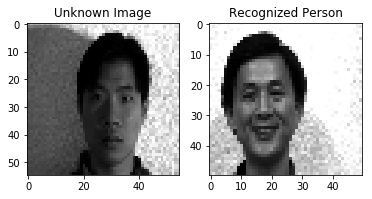

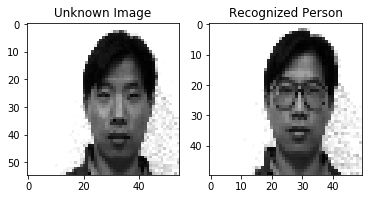

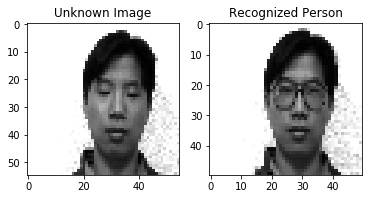

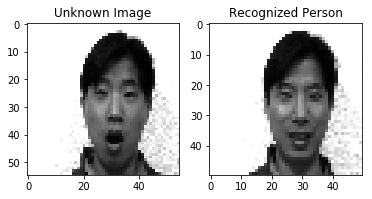

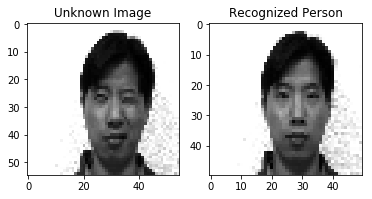

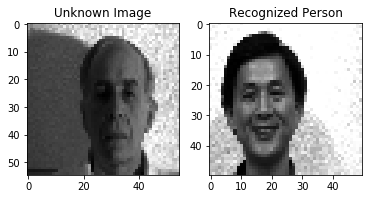

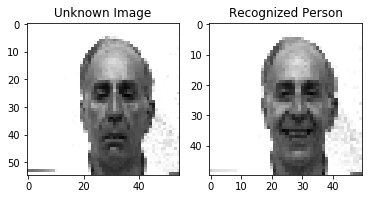

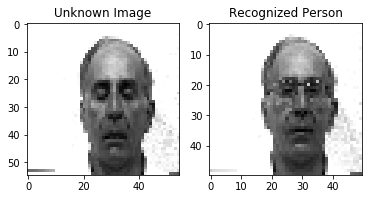

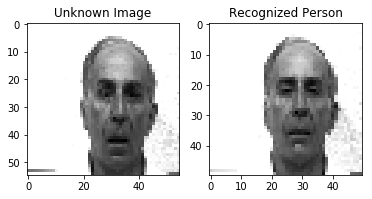

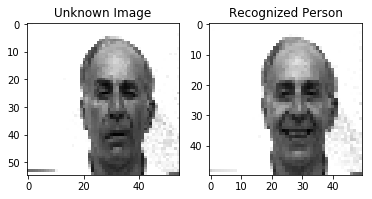

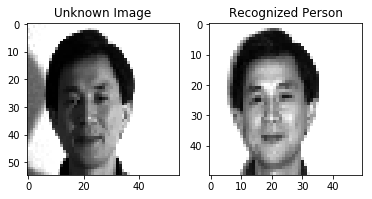

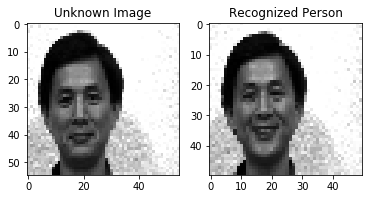

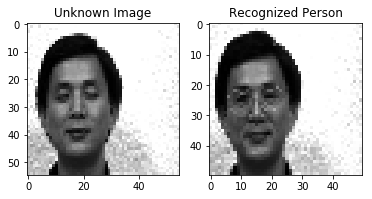

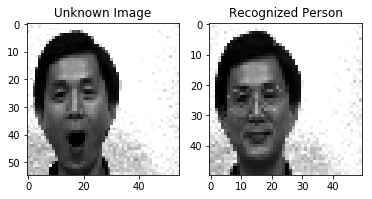

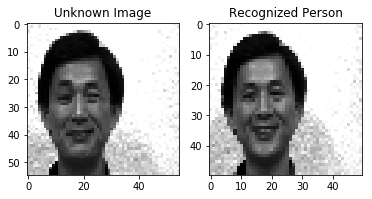

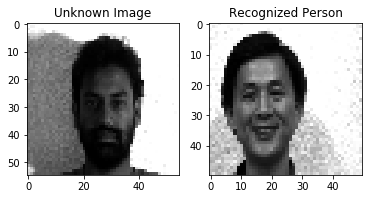

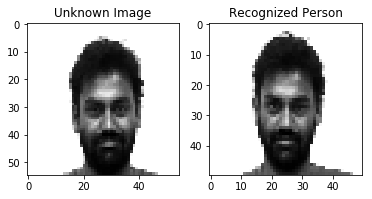

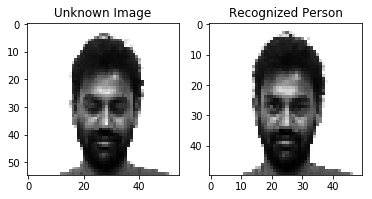

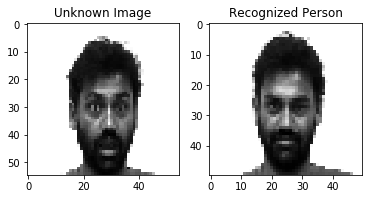

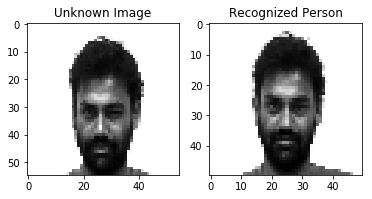

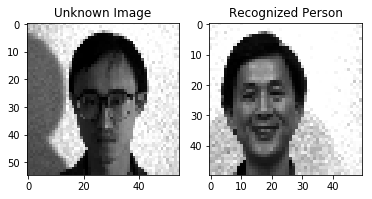

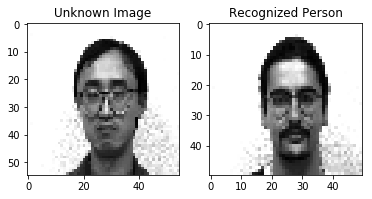

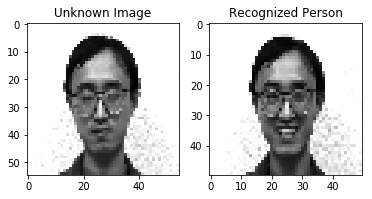

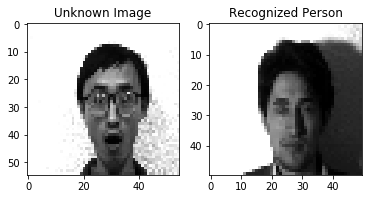

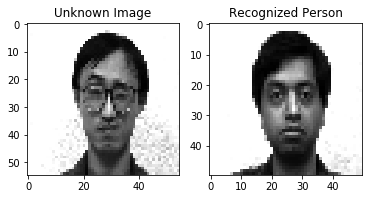

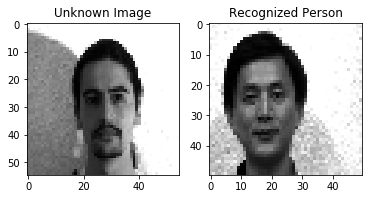

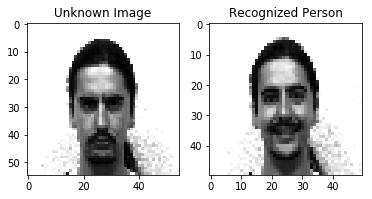

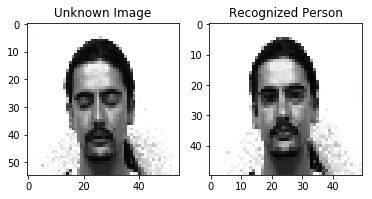

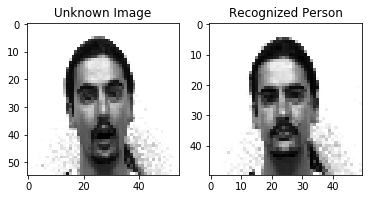

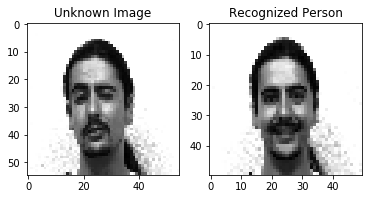

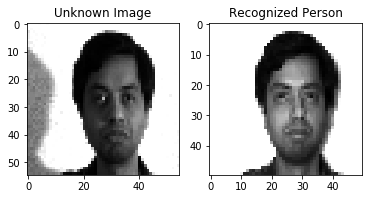

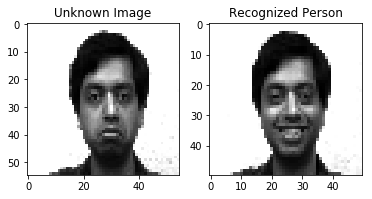

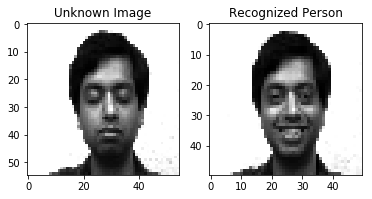

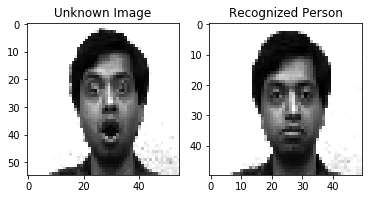

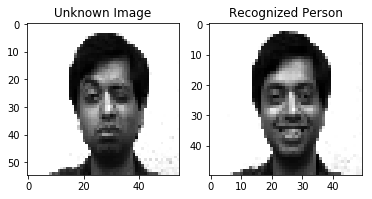

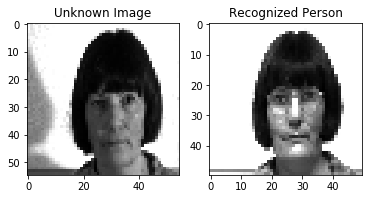

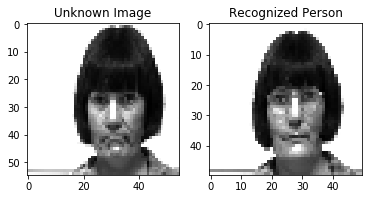

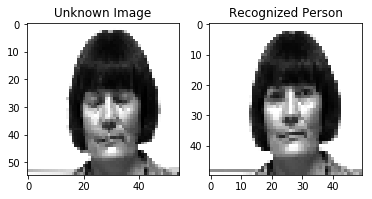

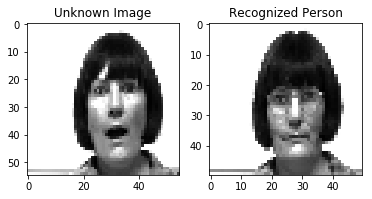

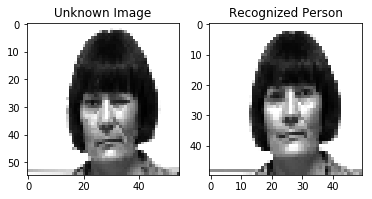

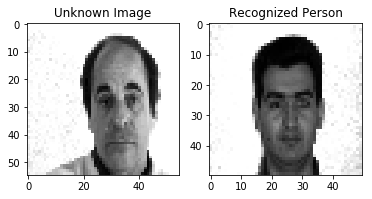

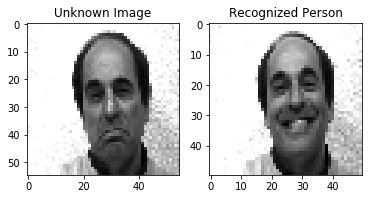

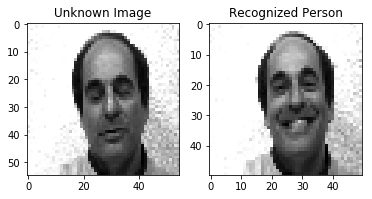

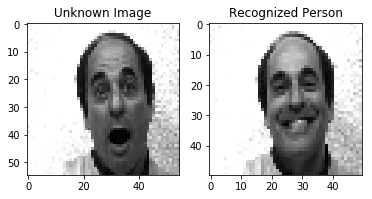

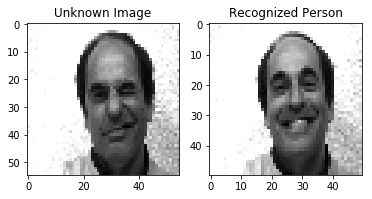

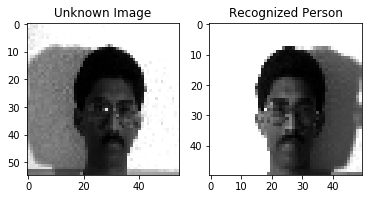

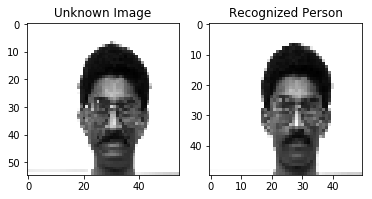

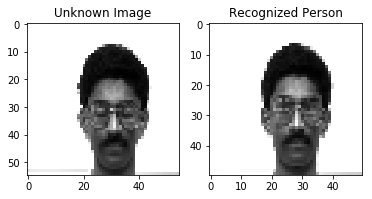

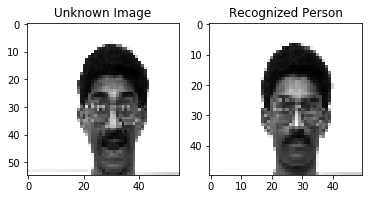

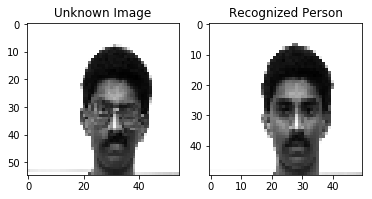

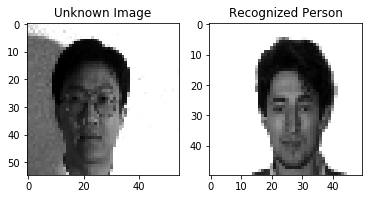

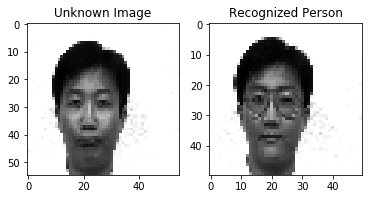

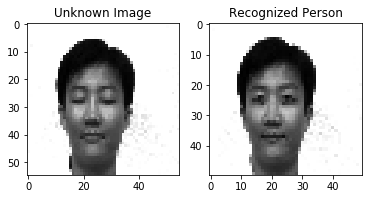

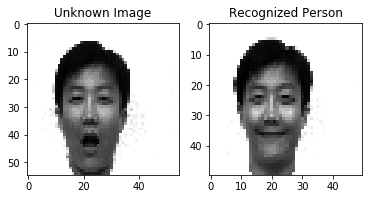

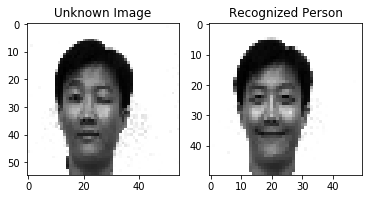

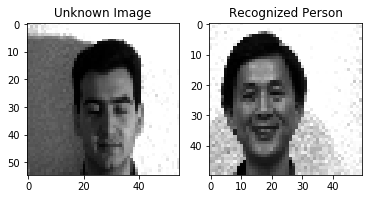

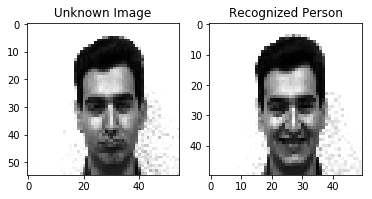

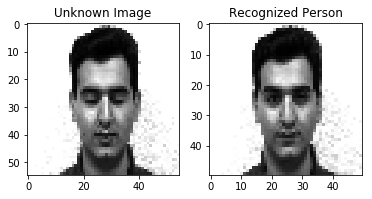

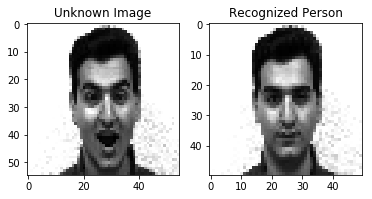

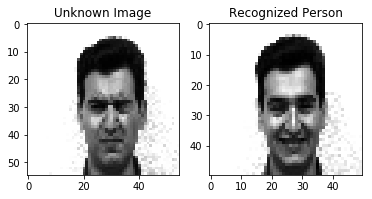

In [10]:
crt=0
total=0
for i in range(0,len(testing_tensor)):
    u_face=testing_tensor[i]
    normalized_u_face=np.subtract(u_face,mean_face)
    unknown_weight=np.dot(eig_vectors_pca,normalized_u_face)
    diff_wt=w-unknown_weight
    norms=np.linalg.norm(diff_wt,axis=1) #calculate the norm for each training image for the given test image
    index=np.argmin(norms) #find the index of the minimum norm (Distance) 
    plt.subplot(1,2,1)
    plt.imshow(u_face.reshape((55,55)),cmap='gray')
    if(train_image_names[index].split(".")[0]==test_image_names[i].split(".")[0]):
        crt+=1
    plt.title('Unknown Image')
    plt.subplot(1,2,2)
    plt.imshow(cv2.resize(imread('newtrain/'+train_image_names[index]),(50,50)), cmap='gray')
    plt.title('Recognized Person')
    plt.show()
    total+=1
    

In [11]:
print("The accuracy using eigenfaces is ",crt/total)
d={'1':[],'2':[],'3':[],'4':[],'5':[],'6':[],'7':[],'8':[],'9':[],'10':[],'11':[],'12':[],'13':[],'14':[],'15':[]} #taking only 10 subjects for classification of train data
k=1 
while(k<16):
    for i in train_dir:
        if(k<=9):
            q='0'+str(k)
            if(i[7:9]==q):
                d[str(k)].append(i)
        
        else:
            q=k
            if(i[7:9]==str(q)):
                d[str(k)].append(i)
    k+=1


The accuracy using eigenfaces is  0.8133333333333334


In [12]:
#Creating a vector containing samples from each class. This is X vector
X=[d[i] for i in d.keys()]
tensor=[]
for i in range(0,15):
    for j in range(0,5):
        img = plt.imread(train_path + X[i][j])
        imresize=cv2.resize(img,(55,55)).flatten() #Pre processing
        tensor.append(np.array(imresize, dtype='float64')) #getting flattened data for each image for convenience while calculation
#slice the tensor for each class
classes_data=[]
for i in range(0,71,5):
    classes_data.append(tensor[i:i+5]) #classes data is of length 15(for each class) and each item is a numpy array consisting of data for each image in that class, flatttened
classes_data_np=np.array(classes_data) #numpy array of classes_data. Classes_data_np[i] will corresponds to all image data in a particular class
print((classes_data_np[0][0].shape))
print(len(classes_data_np)) #15 classes in total

classes_data_np.shape

(3025,)
15


(15, 5, 3025)

## Now find the weights for each image in class corresponding to number of important principal components (10 in the case)

In [13]:
weights=[] #Corresponds to the weights of images in each class
print(imp_eig_vectors.shape)
for i in range(0,15):
    class_weights=[] #weights per class
    for j in range(0,5):
        image_weights=[] #a list of weights per image
        for k in range(0,len(imp_eig_vectors)):
            projected_weight=np.dot(imp_eig_vectors[k],classes_data_np[i][j]) #getting the weights for each of the important eigenvectors for each image
            image_weights.append(projected_weight)   
        class_weights.append(image_weights)
    weights.append(class_weights)
weights=np.array(weights)
print(weights.shape)

(60, 3025)
(15, 5, 60)


## Find Sb and Sw

In [14]:
#First we need the mean weights for each class
mean_weights_class=np.mean(weights,axis=1)
print(mean_weights_class[0].shape[0])
print(weights.reshape((weights.shape[0]*weights.shape[1],weights.shape[2])).mean(axis=0).reshape(1,weights.shape[2]))
#Calculating Sb"
print("Calculating Sb")
Sb=np.zeros((weights.shape[2],weights.shape[2]),dtype='float64')
for i in range(0,len(mean_weights_class)):
    term1=np.subtract(mean_weights_class[i].reshape((1,mean_weights_class[0].shape[0])),weights.reshape((weights.shape[0]*weights.shape[1],weights.shape[2])).mean(axis=0)).reshape(1,weights.shape[2]) 
    term2=np.transpose(term1) 
    product=len(weights[i])*np.matmul(term2,term1) 
    Sb=Sb+product
print(Sb.shape)
print("Sb calculated!")
#Calculating Sw
print("Calculating Sw")
Sw=np.zeros((weights.shape[2],weights.shape[2]),dtype='float64')
for i in range(0,len(weights)):
    for j in range(0,len(weights[i])):
        term1_sw=np.subtract(weights[i][j],mean_weights_class[i].reshape((1,mean_weights_class[0].shape[0]))).reshape(1,weights.shape[2])
        term2_sw=np.transpose(term1_sw)
        product_sw=np.matmul(term2_sw,term1_sw)
        Sw=Sw+product_sw 
print("Sw calculated!")

60
[[ 2673.70636017  6311.88136094 -1170.7066283  -2009.84845357
   -318.48432386 -3835.16935341   762.48905035  -329.81523863
   1100.02130774   181.50313307  -536.91164674  -306.57899677
    348.4734267    921.85886167  1521.72721952   572.0238607
    105.13742261  -202.43062762  -716.89520885   702.17785934
   -146.13272264  -403.73151856   -98.84465856  -631.41212391
    158.78060113    69.04262824  -299.90704517   381.73368172
    307.09630777  -223.9320529     27.52998087   318.71154558
   1280.73461373   -75.4551176    189.02194308   166.00813629
    312.63564173   165.36787727   114.39457135   426.4231306
    352.88456526   163.47606842  -205.32365606  -239.11865668
   -439.06978629   167.16118578   193.46019397   107.40032317
    288.43030767  -144.51336327   486.38333478   177.15490922
    165.09496528  -355.57938578   183.03559307   500.9827093
    314.7151206    -94.35252701    48.86648529    -7.60442769]]
Calculating Sb
(60, 60)
Sb calculated!
Calculating Sw
Sw calculated!

## Obtaining Fisherfaces

(60, 60)
Length of eigenvectors of BinvA  60
Important principal components 60


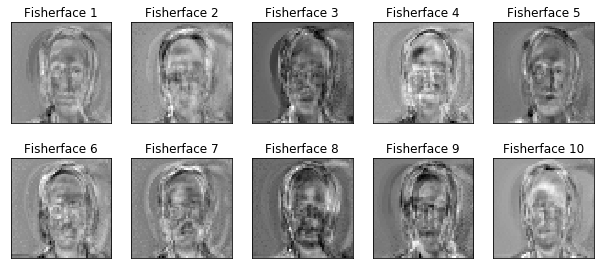

In [15]:
#Compute the inverse matrix and get its eigenvectors and eigenvalues
Sw_inverse=np.linalg.inv(Sw)
BinvA=np.matmul(Sw_inverse,Sb) 
inv_eigval, inv_eigvec=np.linalg.eig(BinvA) #The eigenvectors of this matrix will be used to obtain the fisherfaces
print(inv_eigvec.shape)
print("Length of eigenvectors of BinvA ",len(inv_eigvec))
print("Important principal components",len(imp_eig_vectors))
idx = inv_eigval.argsort()[::-1]   
inv_eigval = inv_eigval[idx]
inv_eigvec = inv_eigvec[:,idx]
#Fisherfaces
inv_eigvec=np.transpose(inv_eigvec) #This will be project on fishers
plt.figure(figsize=(12,6))
for i in range(1,11,1):
    plt.subplot(2,5,i)
    plt.imshow(np.reshape(np.real(np.matmul(inv_eigvec[i-1],imp_eig_vectors)),(55,55)),cmap='gray')
    plt.title('Fisherface {}'.format(i))
    plt.subplots_adjust(right=0.8, top=0.7)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()
inv_eigvec=inv_eigvec[:10] #Taking c-1 fisherfaces

## Get weights of training images using fisherfaces

In [16]:
all_imgs_w = np.reshape(weights,(-1,inv_eigvec.shape[-1])) #75 training images, each image represented by 50 pca eigenfaces
train_coeffs = []
for i in range(len(all_imgs_w)):
    t = []
    for j in range(len(inv_eigvec)):
        t.append(np.dot(inv_eigvec[j],all_imgs_w[i])) #Projecting eigenvectors to the weights
    train_coeffs.append(t)
train_coeffs = np.array(train_coeffs)
print(all_imgs_w.shape)
print(len(inv_eigvec))
print(len(train_coeffs))

(75, 60)
10
75


## Getting coefficients for test images using PCA

In [17]:
test_imgs=testing_tensor #Using PCA
print(test_imgs.shape)
print(len(testing_tensor))
#test_imgs_vec = np.reshape(test_imgs,(-1,test_imgs.shape[-2]*test_imgs.shape[-1]))
test_pca_coeffs = []
for i in range(len(test_imgs)):
    t = []
    for j in range(len(imp_eig_vectors)):
        t.append(np.dot(imp_eig_vectors[j],test_imgs[i]))
    test_pca_coeffs.append(t)
test_pca_coeffs = np.array(test_pca_coeffs)
lda_compute=test_pca_coeffs
print(len(test_pca_coeffs))

(75, 3025)
75
75


## Getting coefficients for test images using Fisherfaces after projecting on PCA

In [18]:
test_flda = []
for i in range(len(lda_compute)):
    t = []
    for j in range(len(inv_eigvec)):
        t.append(np.dot(inv_eigvec[j],lda_compute[i]))
    test_flda.append(t)
test_flda = np.array(test_flda)
len(test_flda)

75

## Making predictions by computing distance

In [19]:
pred = []
for i in range(len(test_flda)):
    d = []
    for j in range(len(train_coeffs)):
        d.append(np.sum(np.square(test_flda[i]-train_coeffs[j])))
    d = np.array(d)
    pred.append(np.argmin(d))
print(pred)

[29, 0, 0, 3, 0, 9, 7, 9, 7, 7, 27, 13, 12, 14, 13, 29, 17, 19, 17, 17, 29, 22, 22, 22, 22, 29, 28, 27, 28, 27, 29, 32, 32, 33, 33, 39, 21, 37, 61, 37, 43, 43, 42, 42, 42, 49, 46, 46, 49, 49, 51, 54, 52, 50, 51, 56, 58, 58, 58, 58, 62, 61, 61, 61, 64, 66, 67, 69, 67, 67, 29, 72, 71, 73, 73]


## Compute accuracy of predictions of fishers

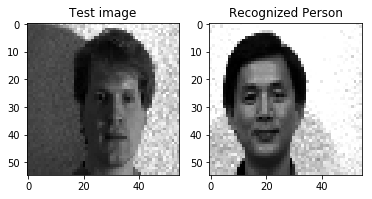

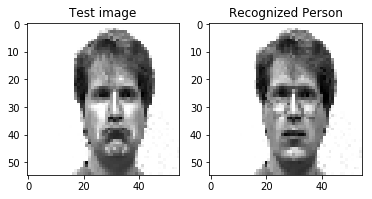

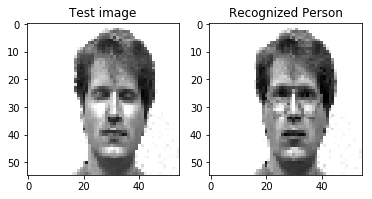

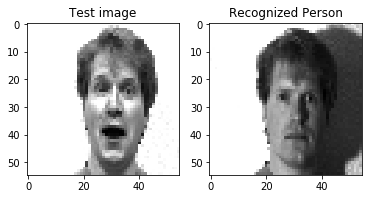

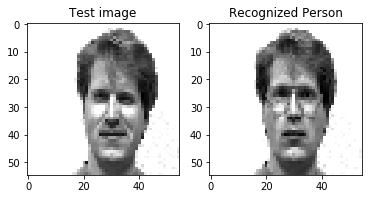

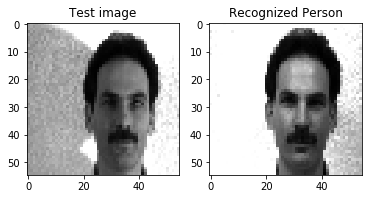

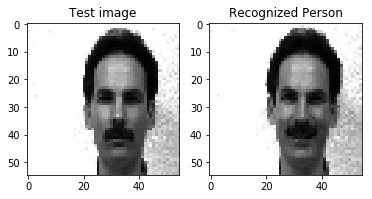

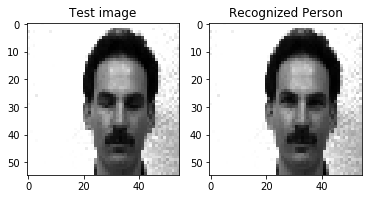

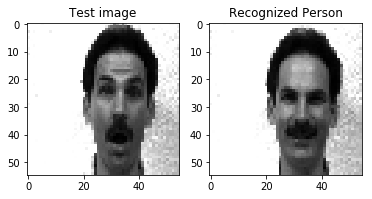

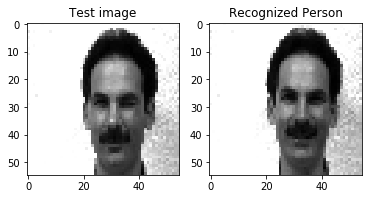

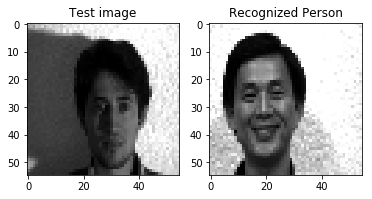

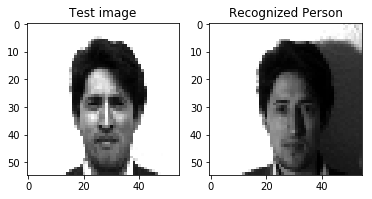

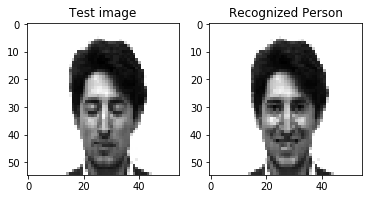

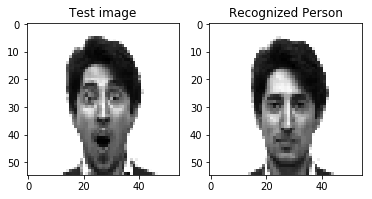

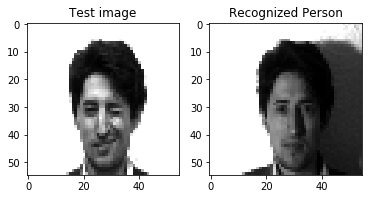

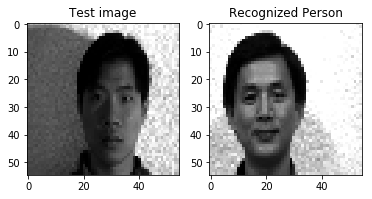

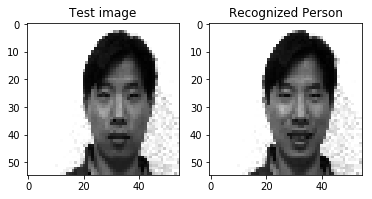

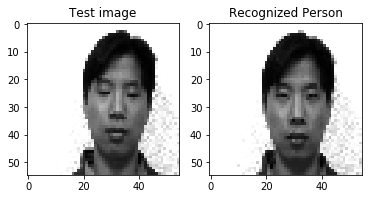

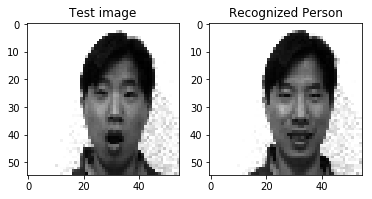

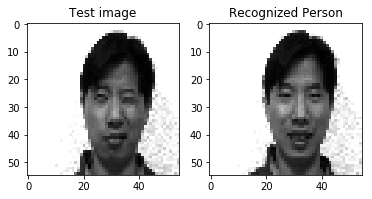

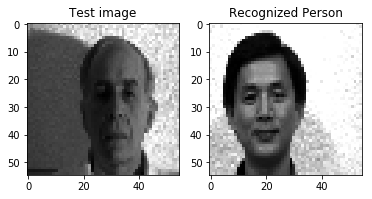

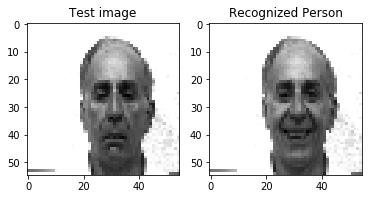

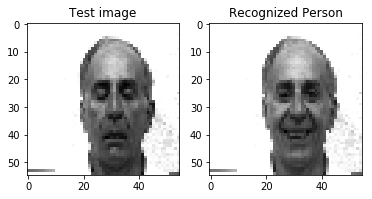

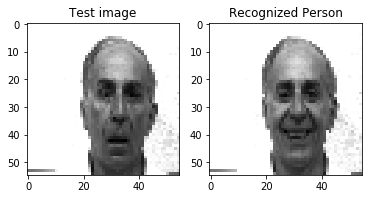

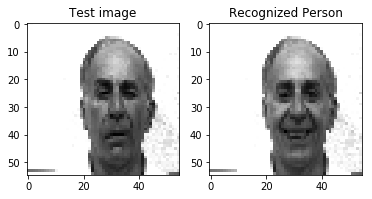

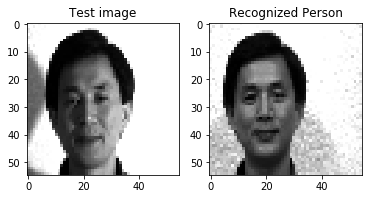

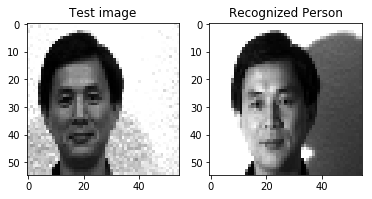

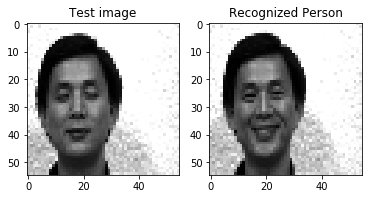

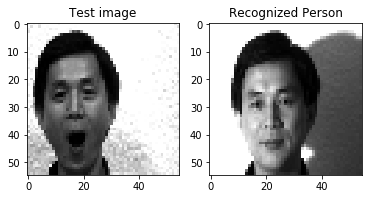

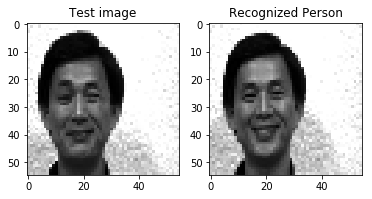

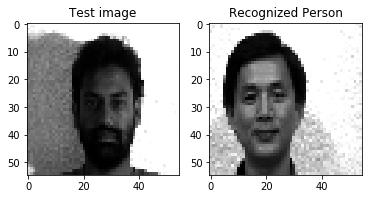

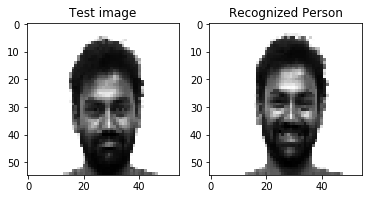

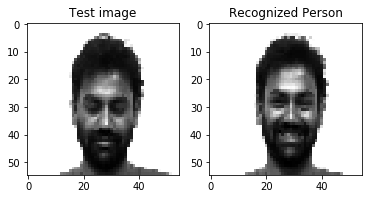

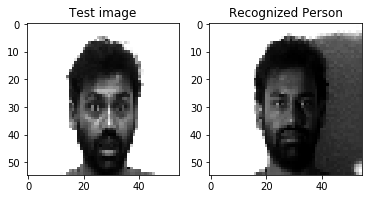

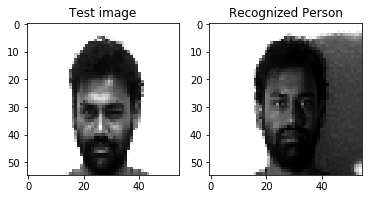

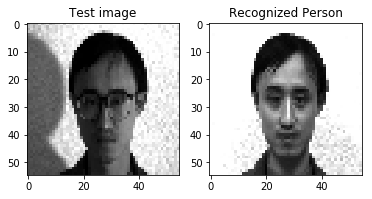

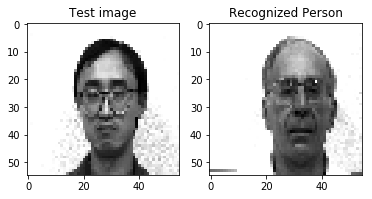

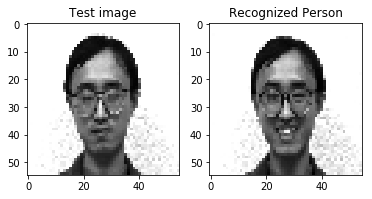

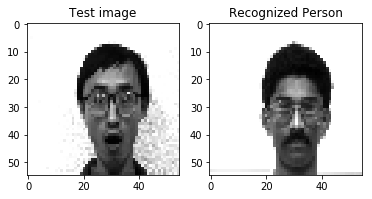

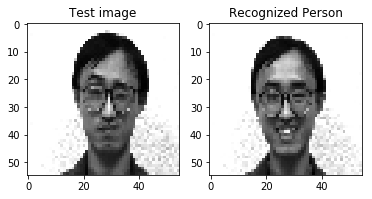

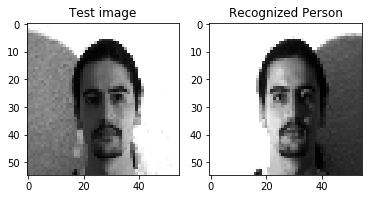

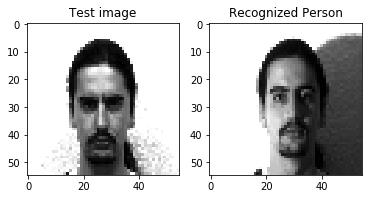

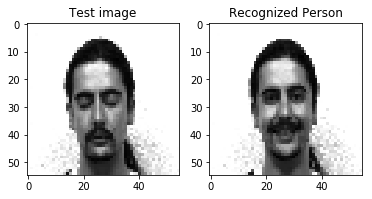

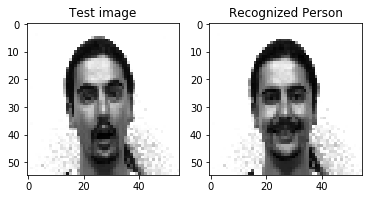

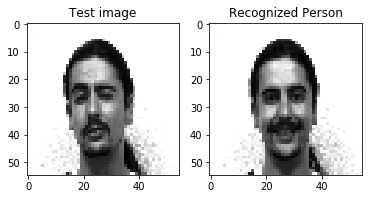

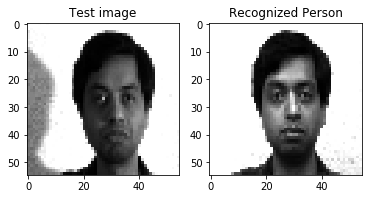

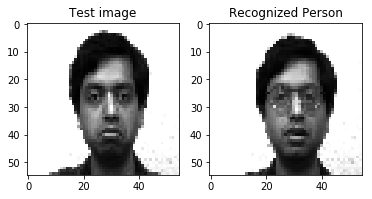

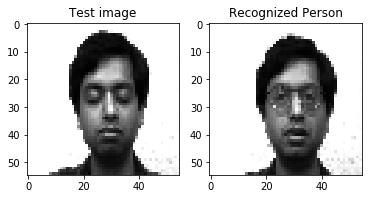

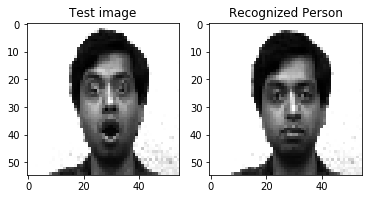

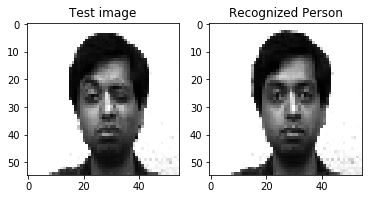

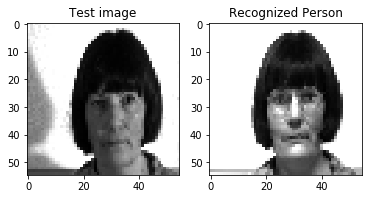

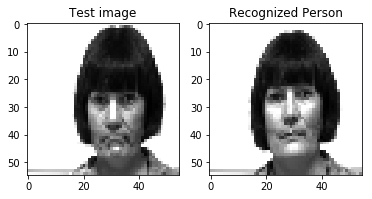

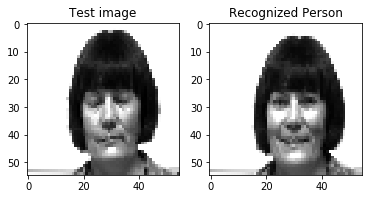

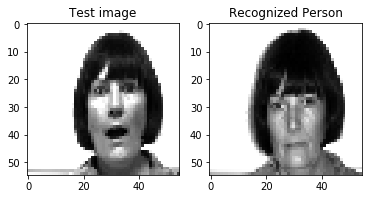

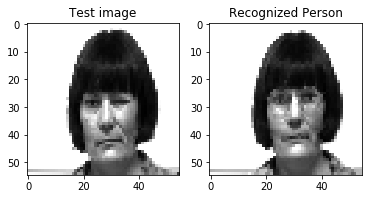

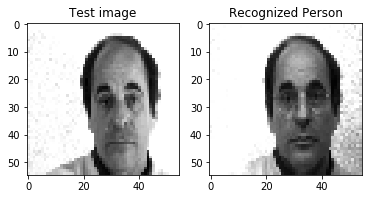

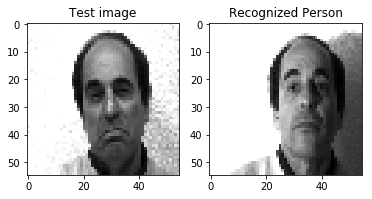

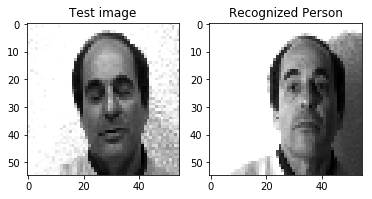

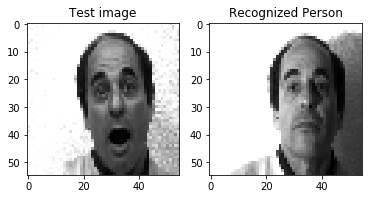

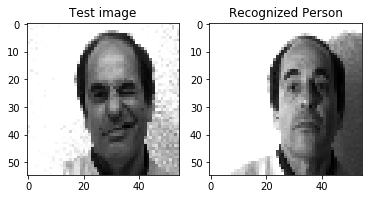

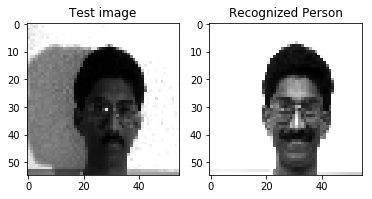

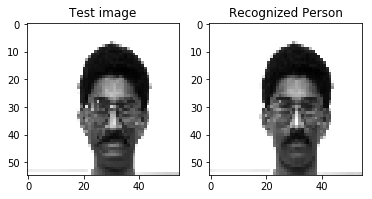

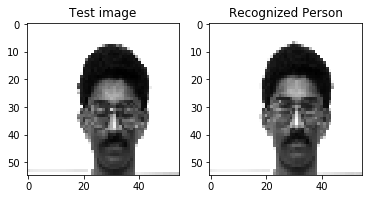

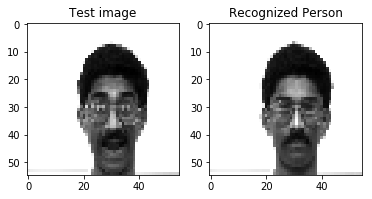

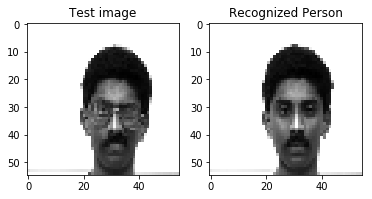

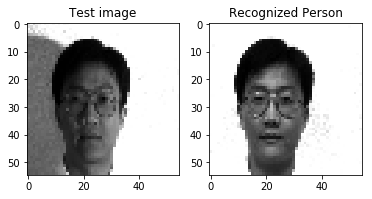

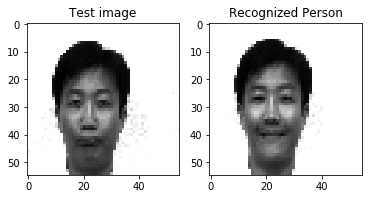

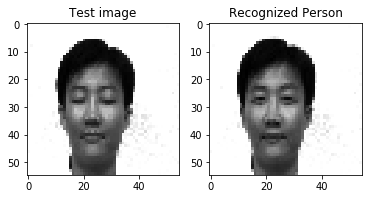

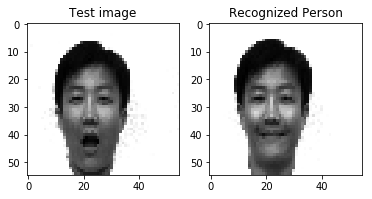

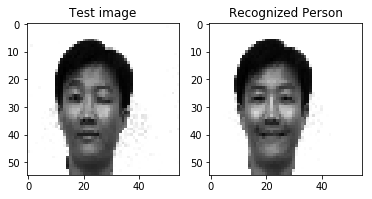

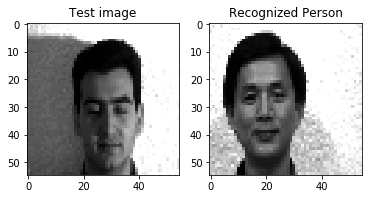

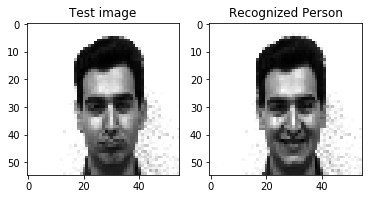

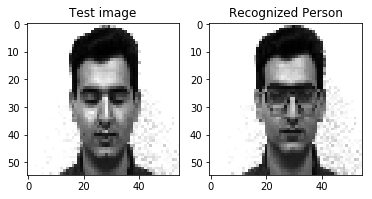

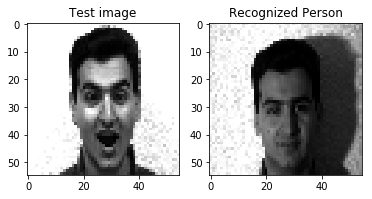

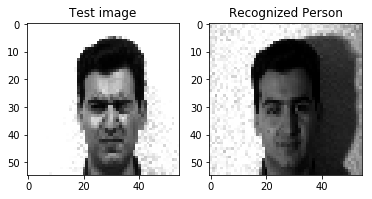

In [20]:
crt2=0
total2=0
for i in range(0,len(test_imgs)):
    plt.subplot(1,2,1)
    plt.imshow(test_imgs[i].reshape((55,55)),cmap='gray')
    plt.title('Test image')
    plt.subplot(1,2,2)
    plt.imshow(np.reshape(img_vectors[pred[i]],(55,55)),cmap='gray')
    plt.title('Recognized Person')
    plt.show()
    if(train_image_names[i].split(".")[0]==test_image_names[pred[i]].split(".")[0]):
        crt2+=1
    total2+=1

In [21]:
print("The accuracy using 10 Fisherfaces is ",crt2/total2)

The accuracy using 10 Fisherfaces is  0.8933333333333333
